Classes: ['class_a', 'class_b', 'class_c', 'class_d', 'class_e']


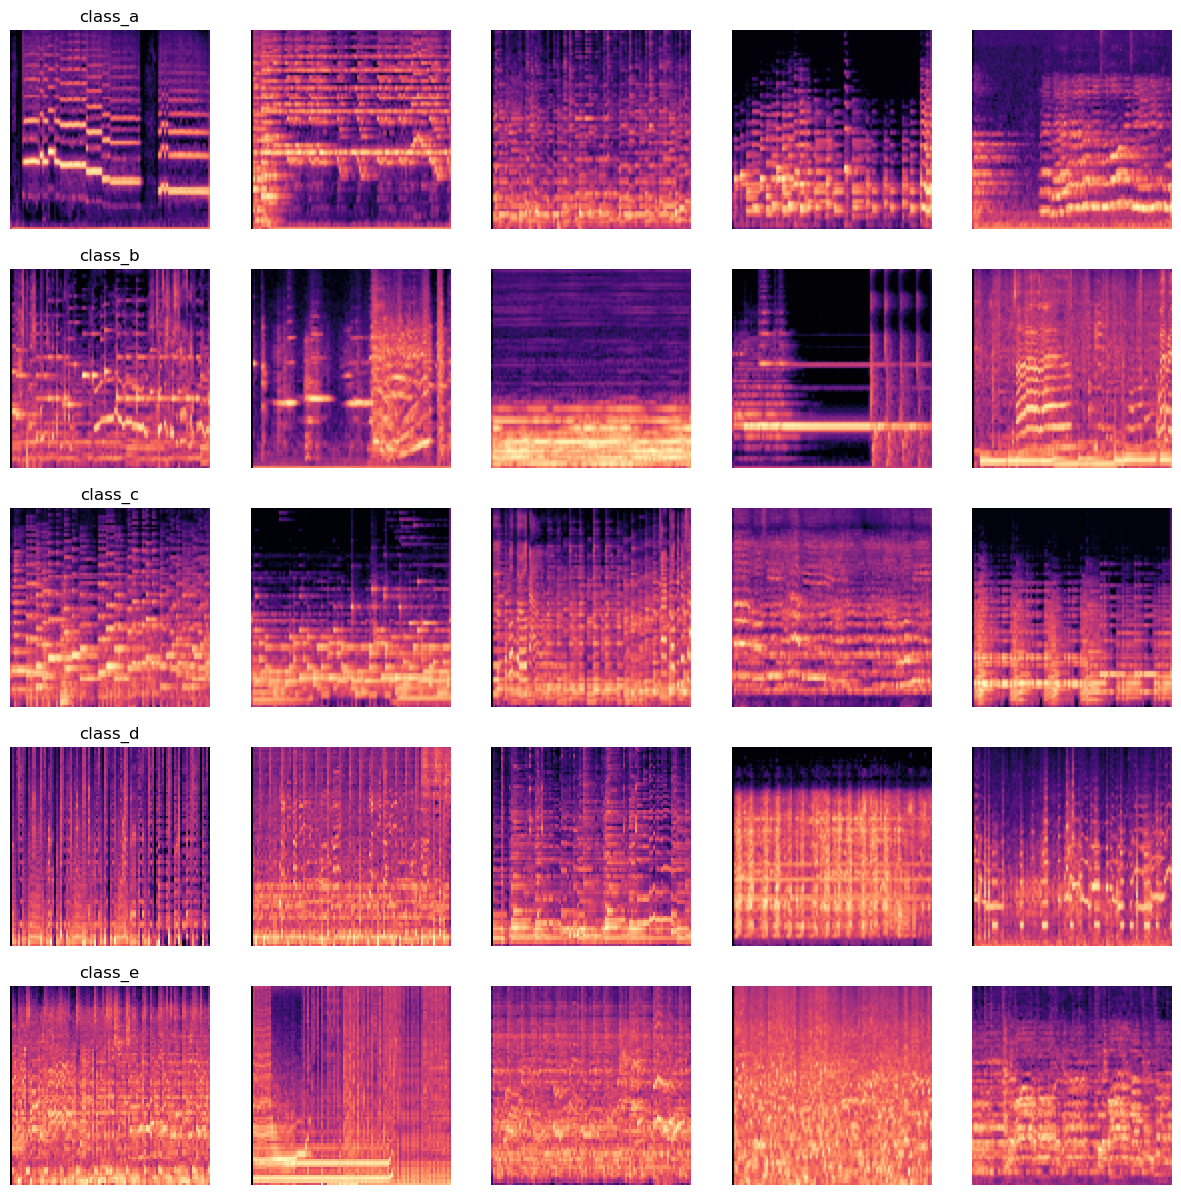

Loaded 2500 images with shape (2500, 100, 100, 3)


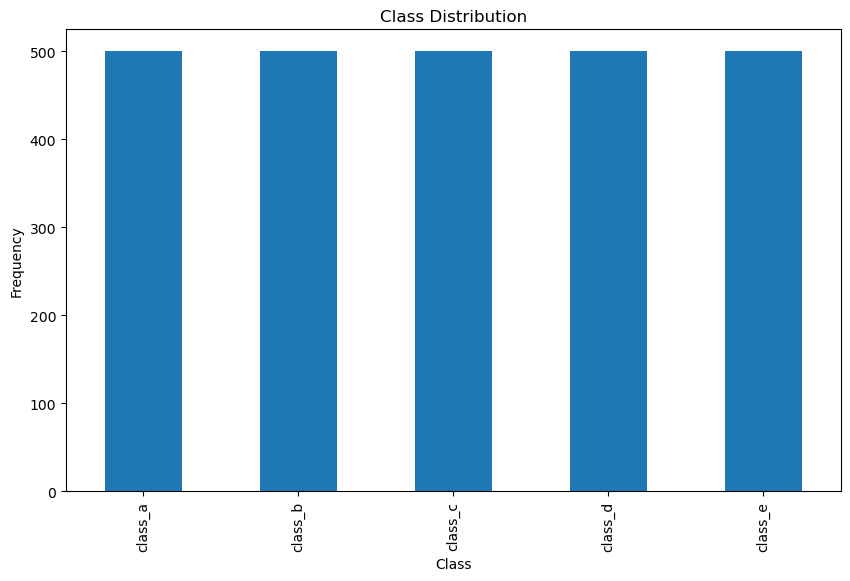

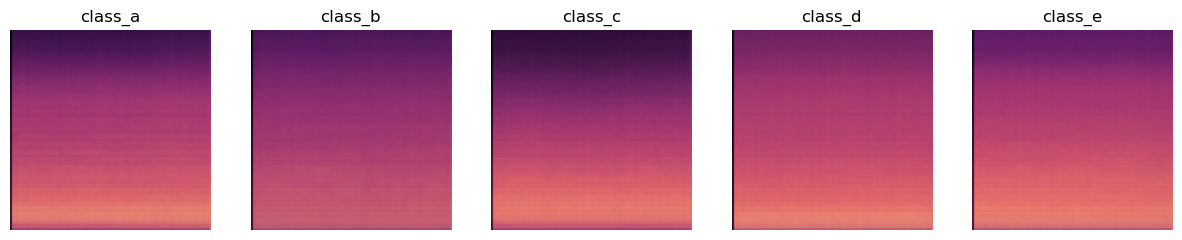

Encoded labels: [0 0 0 ... 4 4 4]
Training set: (2000, 100, 100, 3), Testing set: (500, 100, 100, 3)


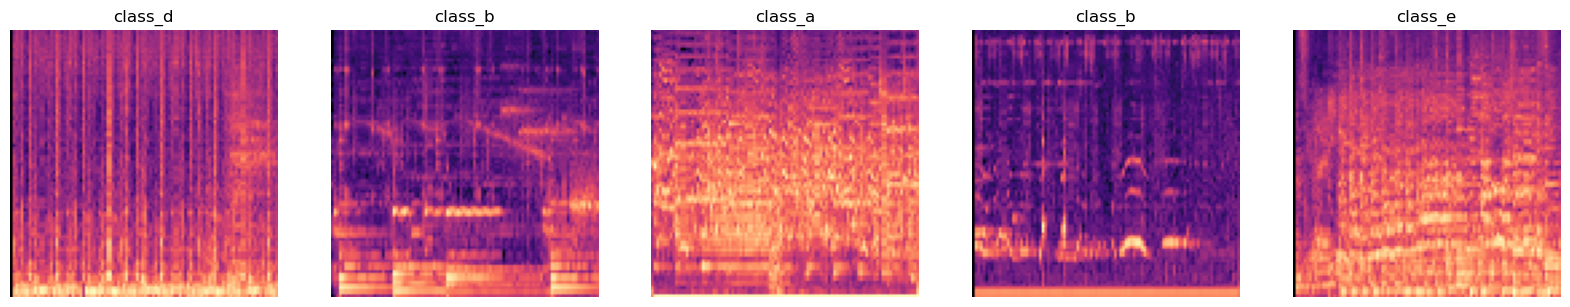

C:\Users\kreti\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 49, 49, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,490,565 (9.50 MB)

 Trainable params: 2,489,605 (9.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [1]:
#libraries - restricted usage to those covered in CSC300

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler

#print class file names
#dataset_path = r"C:\Users\harrison\Documents\USC\2024\Practical Machine Learning\Task 3/CNN_Task3"
dataset_path = './dataset/CNN_Task3' #relative path, same as the python file
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print(f"Classes: {classes}")


#loading and displaying some images from each class
def load_and_show_samples(dataset_path, classes):
    fig, axes = plt.subplots(len(classes), 5, figsize=(15, 15))
    for i, cls in enumerate(classes):
        cls_path = os.path.join(dataset_path, cls)
        for j, img_name in enumerate(os.listdir(cls_path)[:5]):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                if j == 0:
                    axes[i, j].set_title(cls)
            except PermissionError as e:
                print(f"PermissionError: {e} for file {img_path}")
                axes[i, j].axis('off')
                axes[i, j].set_title('Permission Denied')
    plt.show()

#show images
load_and_show_samples(dataset_path, classes)


# load images with labels
def load_images_and_labels(dataset_path, classes):
    images = []
    labels = []
    for cls in classes:
        cls_path = os.path.join(dataset_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                img = ImageOps.exif_transpose(img)  
                img = img.convert('RGB')  
                img = img.resize((100, 100))  # resize images to 100x100 resolution for computation time
                img_array = np.array(img)
                images.append(img_array)
                labels.append(cls)
            except PermissionError as e:
                print(f"PermissionError: {e} for file {img_path}")
                continue
    return np.array(images), np.array(labels)

# load images and labels
images, labels = load_images_and_labels(dataset_path, classes)
print(f"Loaded {len(images)} images with shape {images.shape}")


#some eda

# function to plot class distribution
def plot_class_distribution(labels):
    plt.figure(figsize=(10, 6))
    pd.Series(labels).value_counts().sort_index().plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

# load labels only for EDA
_, labels = load_images_and_labels(dataset_path, classes)
plot_class_distribution(labels)

# more EDA: showing average image of each class
def plot_average_images(dataset_path, classes):
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 15))
    for i, cls in enumerate(classes):
        cls_path = os.path.join(dataset_path, cls)
        avg_img = np.zeros((100, 100, 3), np.float64)  # Use np.float64 instead of np.float
        count = 0
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path).convert('RGB')  # Convert image to RGB
                img = img.resize((100, 100))  # Resize images to 100x100
                img_array = np.array(img).astype(np.float64)  # Use np.float64 instead of np.float
                avg_img += img_array
                count += 1
            except PermissionError as e:
                print(f"PermissionError: {e} for file {img_path}")
                continue
        avg_img /= count
        avg_img = avg_img.astype(np.uint8)
        axes[i].imshow(avg_img)
        axes[i].axis('off')
        axes[i].set_title(cls)
    plt.show()

# Display average images for each class
plot_average_images(dataset_path, classes)


# convert categorical labels into a numerical format, 0, 1, 2, etc
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
print(f"Encoded labels: {encoded_labels}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42) #20% of data is used to validate
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

# divies each pixel by 255 to normalize these values to the range of 0-1 to help speed up training 
X_train = X_train / 255.0
X_test = X_test / 255.0

# Display some preprocessed images
def show_preprocessed_images(images, labels, classes, n=5):
    fig, axes = plt.subplots(1, n, figsize=(20, 20))
    for i in range(n):
        idx = np.random.randint(0, len(images))
        axes[i].imshow(images[idx])
        axes[i].axis('off')
        axes[i].set_title(classes[labels[idx]])
    plt.show()

# Show preprocessed images
show_preprocessed_images(X_train, y_train, classes)

# Define data augmentation for training data
#this helps to model learn by applying various transofmrations to the training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.1,  
    horizontal_flip=True,
    fill_mode='nearest'
)

# no need for augmentation for the validatiion data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)


#defining the cnn model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), #try and prevent overfitting
    Dense(5, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #adam is an adaptive learning rate optimizer
model.summary()





In [ ]:
# Define learning rate schedule
def lr_schedule(epoch): #determines how the learning rate changes based on epoch number
    lr = 1e-3
    if epoch > 10:
        lr = 1e-4
    elif epoch > 20:
        lr = 1e-5
    return lr


lr_scheduler = LearningRateScheduler(lr_schedule)

# start to train the model
history = model.fit(
    train_generator, #training data
    epochs=30, #number of epochs to train the model on
    validation_data=test_generator, # validation data
    callbacks=[lr_scheduler]
)


Epoch 1/30


C:\Users\kreti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/63 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.2653 - loss: 3.6798

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
